In [1]:
from pkg import *

# ----- Define Standardise Function -----

def standardise(data):
    for col in data.columns:
        if col not in exclude_cols:
            data[col] = (data[col] - data[col].mean()) / data[col].std()
    return data

# ----- Exclude ID, Use and Boolean Columns -----

exclude_cols = ['id', 'use', 'ir_agn', 'xray_agn', 'radio_agn', 'agn', 'true_agn']

# ----- Standardise and Overwrite NaNs -----

cdfs, cos, uds = cdfs.copy(), cos.copy(), uds.copy()
cdfs_std, cos_std, uds_std = standardise(cdfs.drop(columns = exclude_cols)), standardise(cos.drop(columns = exclude_cols)), standardise(uds.drop(columns = exclude_cols))

cdfs_arr, cos_arr, uds_arr = np.nan_to_num(np.array(cdfs_std)), np.nan_to_num(np.array(cos_std)), np.nan_to_num(np.array(uds_std))

# ----- Perform PCA -----

pca_cdfs, pca_cos, pca_uds = PCA(), PCA(), PCA()

cdfs_pca, cos_pca, uds_pca = pca_cdfs.fit_transform(cdfs_arr), pca_cos.fit_transform(cos_arr), pca_uds.fit_transform(uds_arr)

# Convert PCA results back to DataFrame and add excluded columns
cdfs_pca_df = pd.DataFrame(cdfs_pca, columns=[f'PC{i+1}' for i in range(cdfs_pca.shape[1])])
cdfs_pca_df = pd.concat([cdfs[exclude_cols].reset_index(drop=True), cdfs_pca_df], axis=1)

cos_pca_df = pd.DataFrame(cos_pca, columns=[f'PC{i+1}' for i in range(cos_pca.shape[1])])
cos_pca_df = pd.concat([cos[exclude_cols].reset_index(drop=True), cos_pca_df], axis=1)

uds_pca_df = pd.DataFrame(uds_pca, columns=[f'PC{i+1}' for i in range(uds_pca.shape[1])])
uds_pca_df = pd.concat([uds[exclude_cols].reset_index(drop=True), uds_pca_df], axis=1)

# Print the PCA components to understand what features contribute to each principal component
print("CDFS PCA Components:\n", pd.DataFrame(pca_cdfs.components_, columns=cdfs_std.columns))
print("COS PCA Components:\n", pd.DataFrame(pca_cos.components_, columns=cos_std.columns))
print("UDS PCA Components:\n", pd.DataFrame(pca_uds.components_, columns=uds_std.columns))

# Now you have the transformed data with principal components and original columns


CDFS PCA Components:
            ra           dec        z_peak        z_spec             z  \
0   -0.005446  9.083863e-03 -1.015042e-01  5.725447e-02 -1.031638e-01   
1   -0.006575 -1.840682e-03  2.620031e-02 -5.042951e-03  2.550162e-02   
2   -0.004529  1.248193e-02  2.656175e-02 -9.602711e-03  2.612138e-02   
3    0.013329 -5.535886e-02 -1.670171e-01  7.920172e-02 -1.644337e-01   
4   -0.030992 -4.501414e-02 -1.440100e-02  2.490525e-02 -1.337635e-02   
..        ...           ...           ...           ...           ...   
139 -0.000000 -1.106168e-16  3.553925e-16 -1.200897e-17 -1.372367e-16   
140 -0.000000 -3.575890e-17 -6.967913e-17 -2.374843e-17  3.592529e-16   
141 -0.000000 -1.253246e-17 -2.227226e-18  8.588587e-17 -8.826255e-17   
142 -0.000000 -6.345603e-17 -1.437759e-16 -5.714600e-17  2.478371e-16   
143 -0.000000 -9.877592e-17  2.398727e-16  7.542119e-17 -2.270205e-16   

               HR            Av         lmass          lsfr         lssfr  \
0    5.520942e-02 -3.491

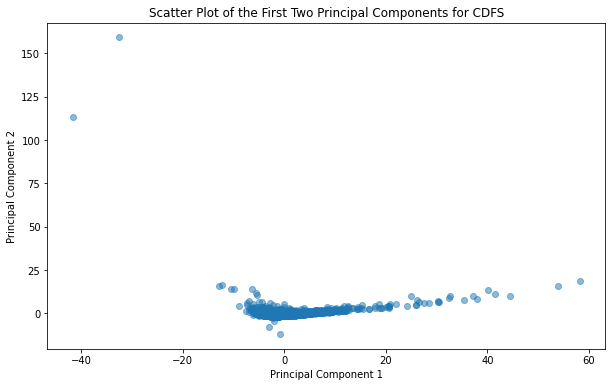

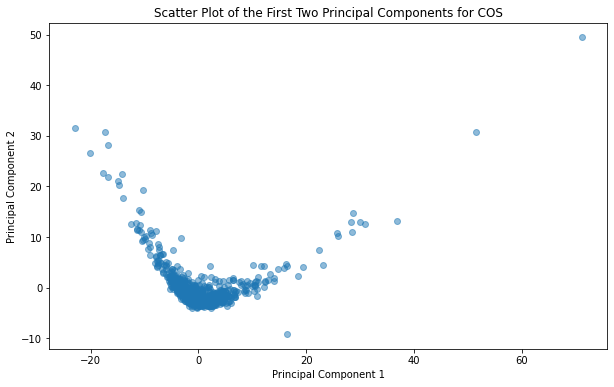

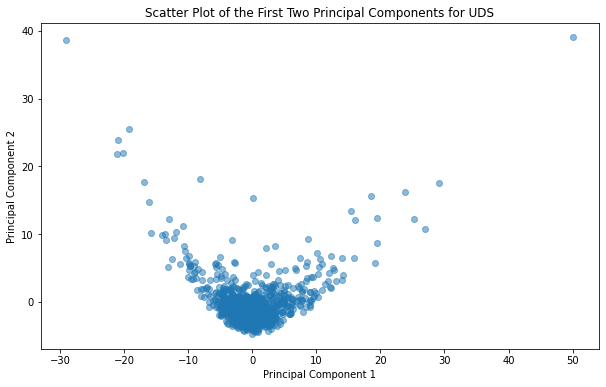

In [2]:
# Scatter plot of the first two principal components
def scatter_plot(pca_df, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.title(f'Scatter Plot of the First Two Principal Components for {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

scatter_plot(cdfs_pca_df, "CDFS")
scatter_plot(cos_pca_df, "COS")
scatter_plot(uds_pca_df, "UDS")
